### Exploring the Response Variable and Concluding the Initial Exploration

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')
mpl.rcParams['font.size'] = 4

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()

In [8]:
lr

LogisticRegression()

In [9]:
lr_model = LogisticRegression(C=1.0,
                             class_weight=None,
                             dual = False,
                             fit_intercept=True,
                              intercept_scaling=1,
                              max_iter=100,
                              multi_class= 'auto',
                              n_jobs= None,
                              penalty = 'l2',
                              random_state = None,
                              solver = 'warn',
                              tol = 0.0001,
                              verbose = 0,
                              warm_start= False)

In [10]:
lr_model

LogisticRegression(solver='warn')

In [11]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [13]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [15]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [16]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating synthetic data

In [18]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [19]:
#data for a linear regression

In [20]:
np.random.seed(seed=1)

slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

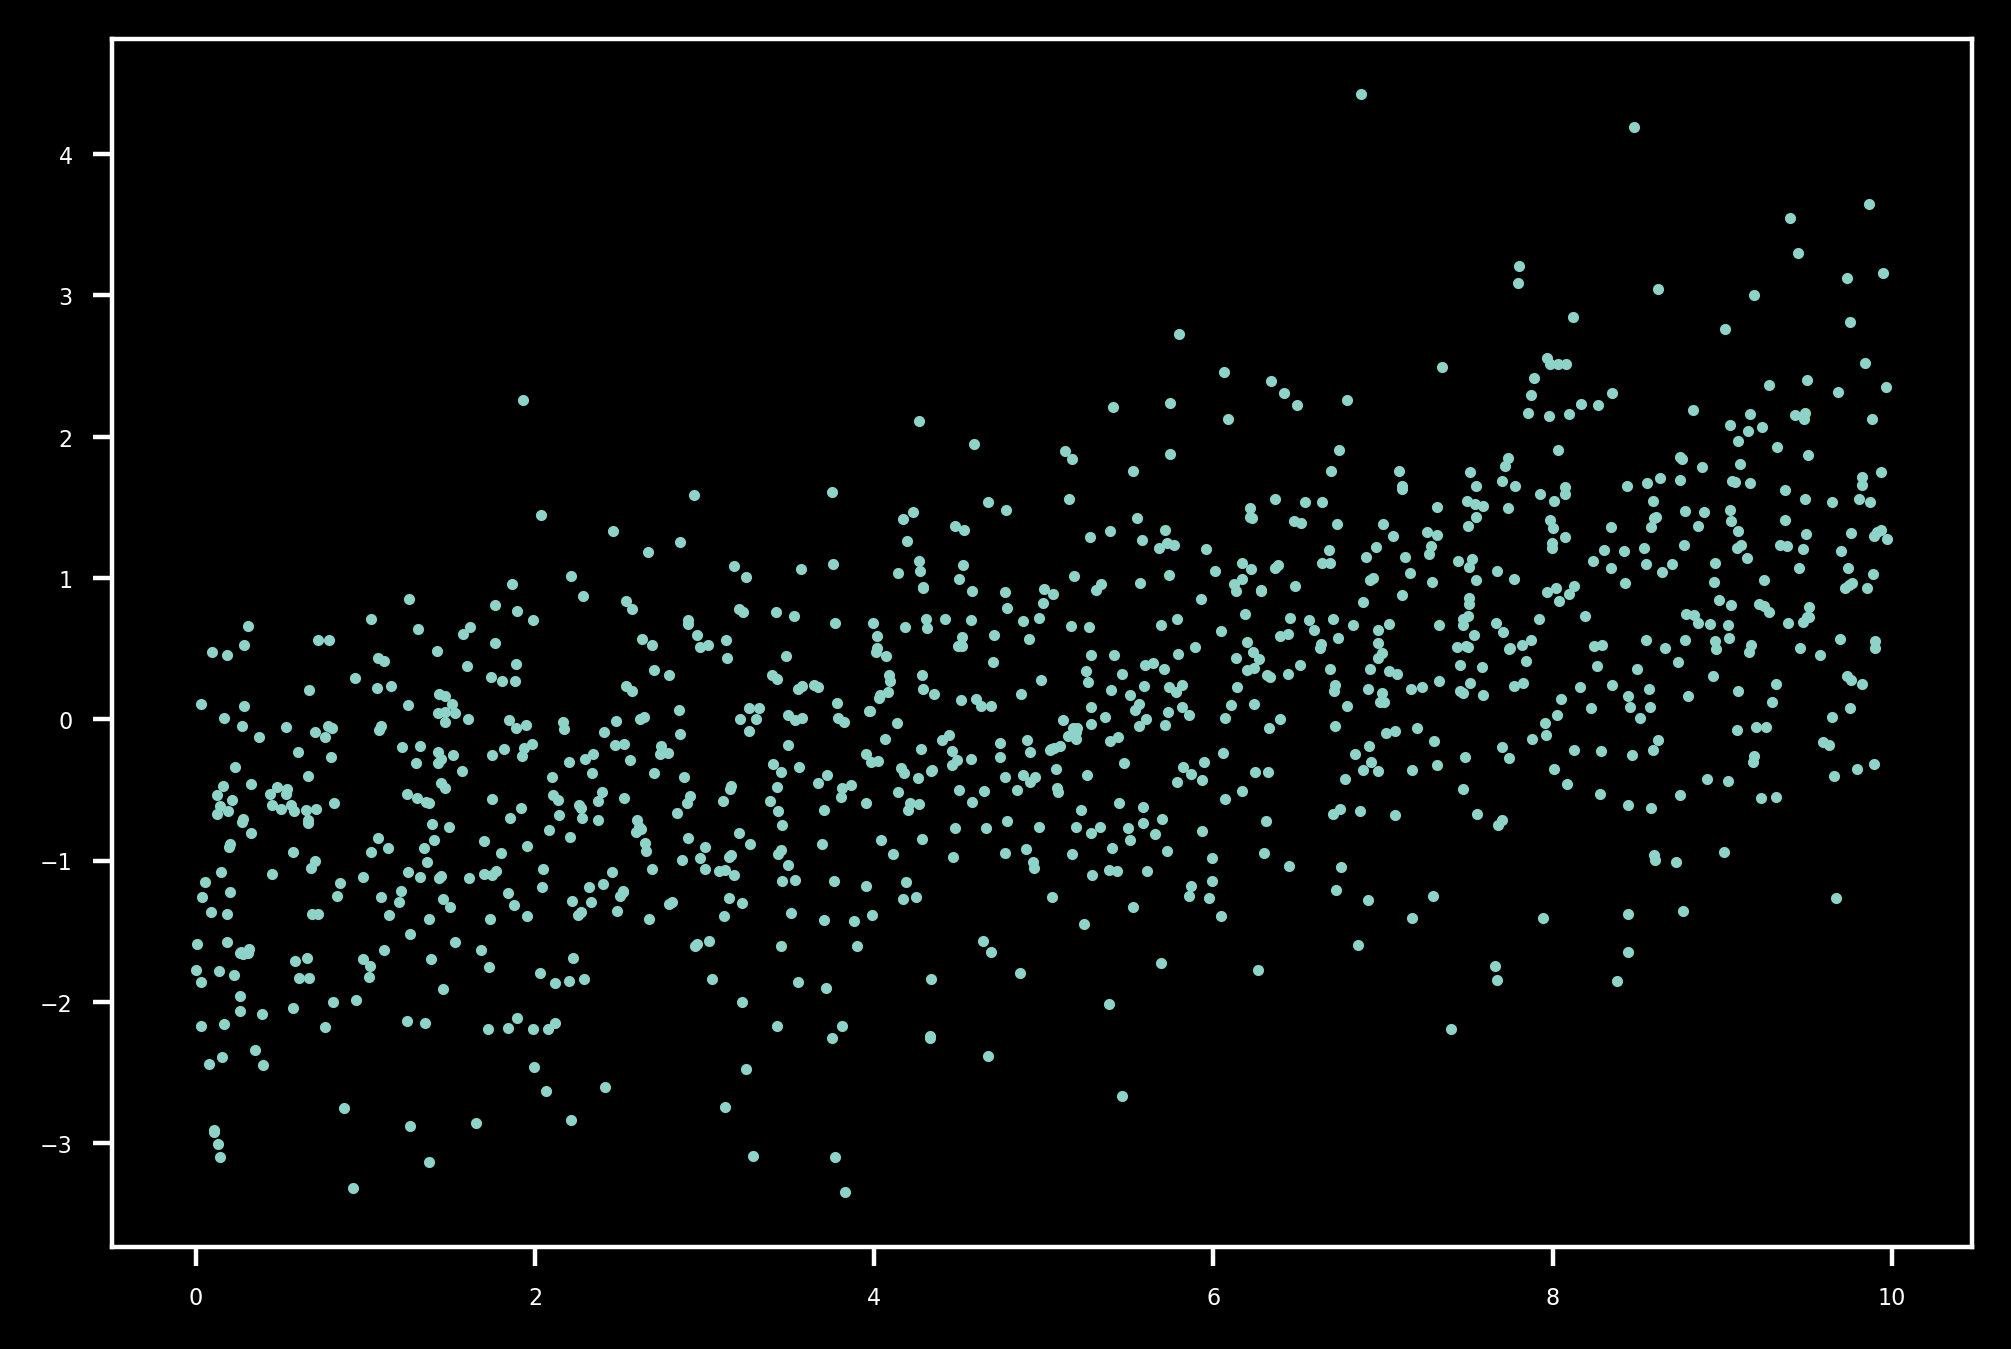

In [21]:
plt.scatter(X, y, s=1)

### Linear Regression in Scikit-Learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [24]:
#fitting the model
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)

-1.1612566002825881


In [25]:
print(lin_reg.coef_)

[0.24002588]


In [26]:
#making predictions
y_pred = lin_reg.predict(X.reshape(-1,1))

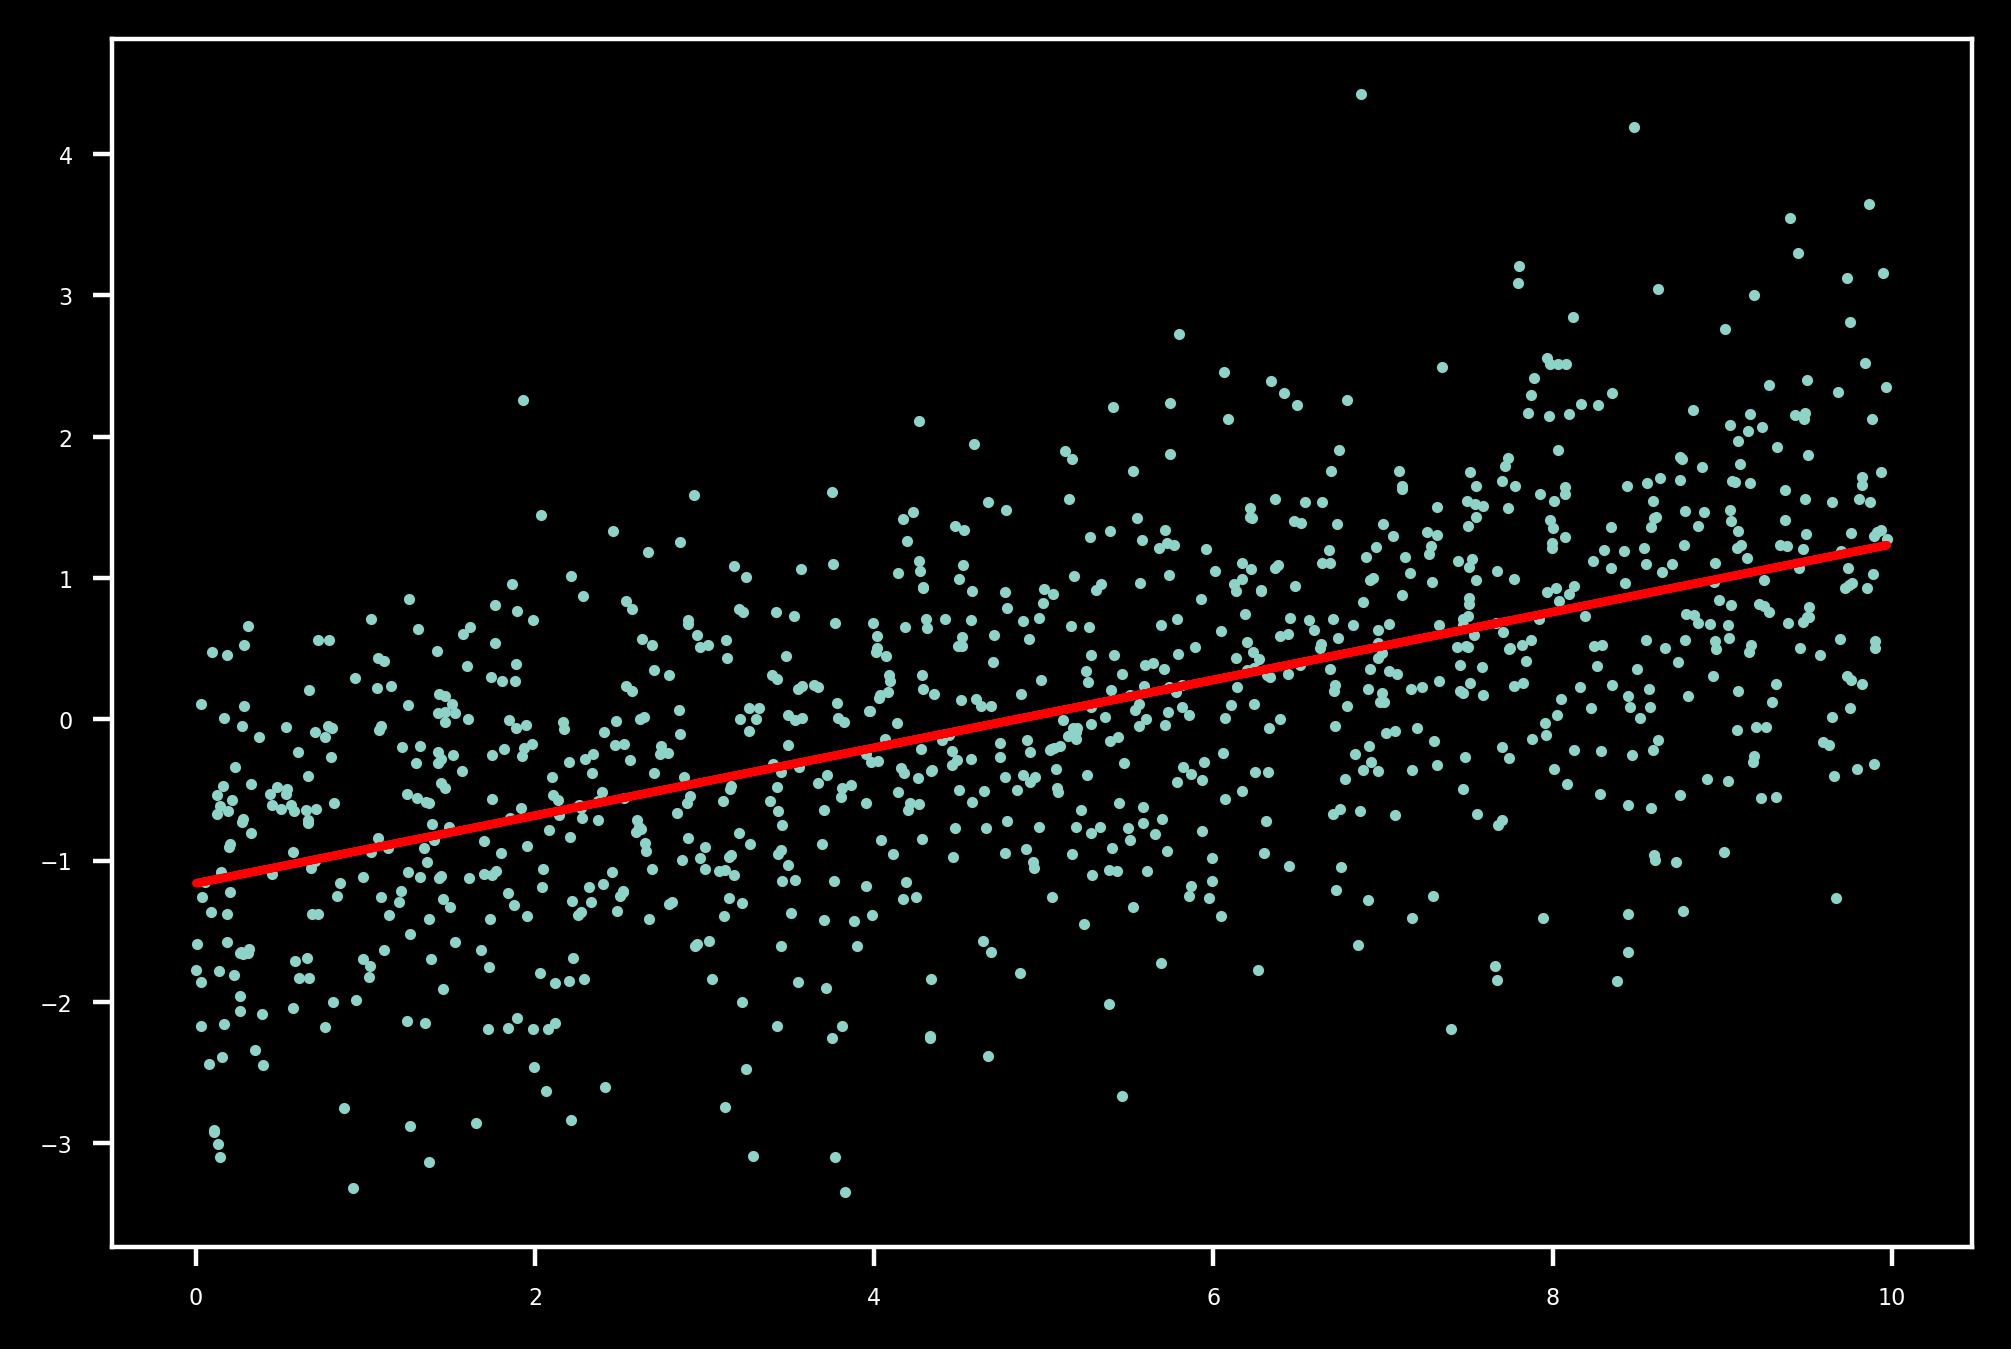

In [27]:
plt.scatter(X,y, s=1)
plt.plot(X,y_pred,'r')

### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [31]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


Note: If the positive class is very rare in our dataset to evenly split the data we can pass stratify argument in the train_test_split function, which will ensure that the train and test data gets the same fraction of data for each class. Here sampling will not be needed as the train set is representative of the test set

In [32]:
# fitting and example model
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [33]:
#training and predictions
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Testing metrics

In [35]:
#accuracy
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [36]:
print(example_lr.score(X_test, y_test))
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498


0.7834239639977498

In [37]:
# tpr, fnr and confusion matrix
#no of +ve samples
P = sum(y_test)
P

1155

In [38]:
#true +ves
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [39]:
TPR = TP/P
TPR #true +ve rate

0.0

In [40]:
#false negatives
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [41]:
FNR = FN/P
FNR #false negative rate

1.0

In [42]:
#TNR and FPR
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [44]:
#obtaining predicted prob
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [45]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
prob_sum.shape

(5333,)

In [47]:
np.unique(prob_sum)

array([1.])

In [48]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

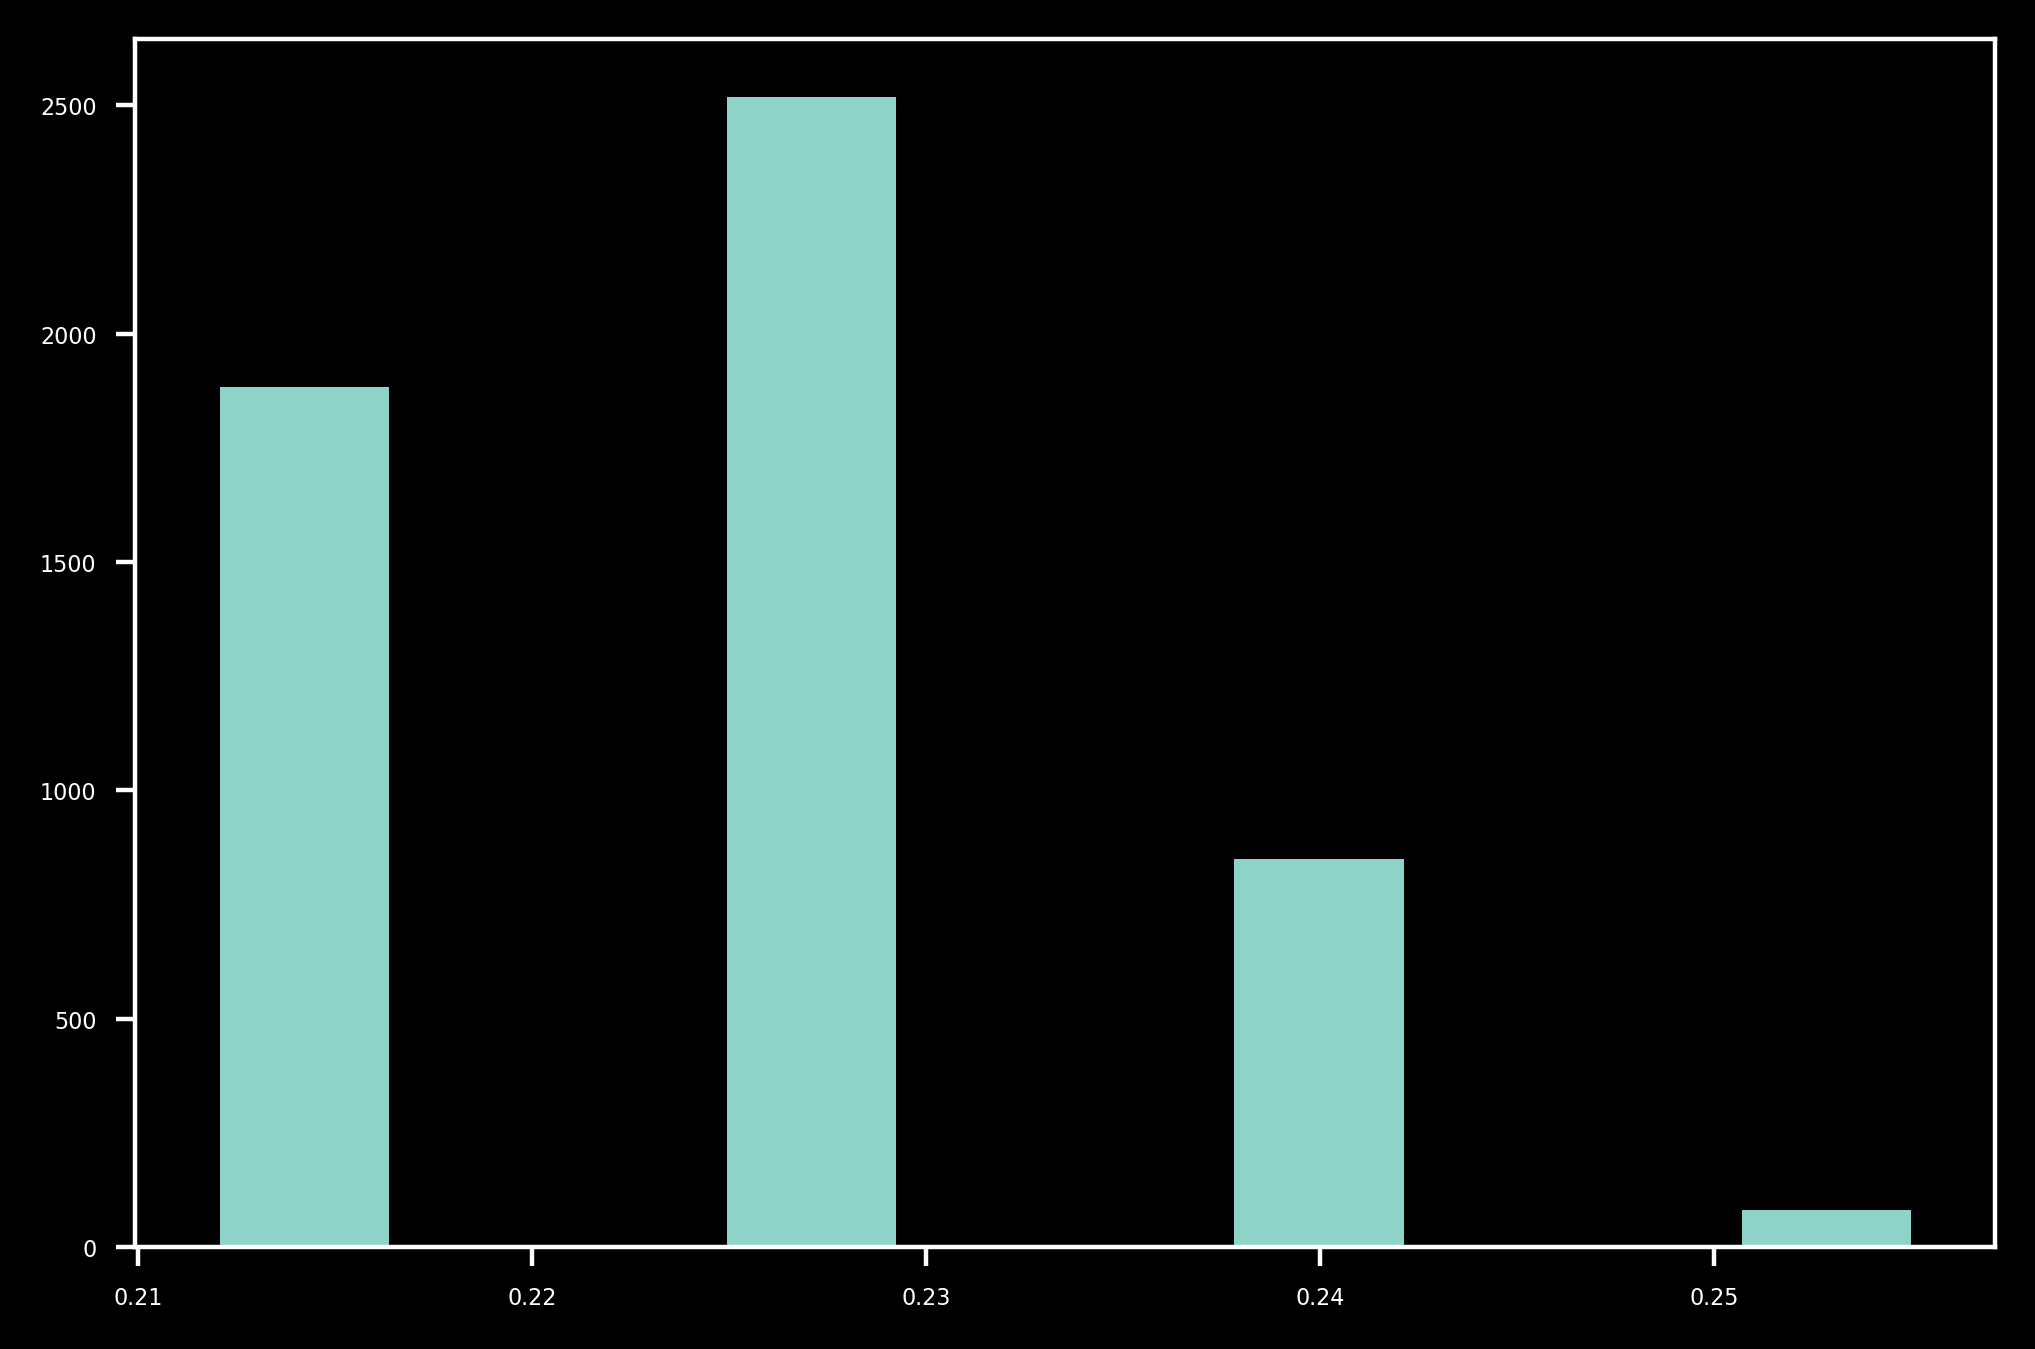

In [49]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

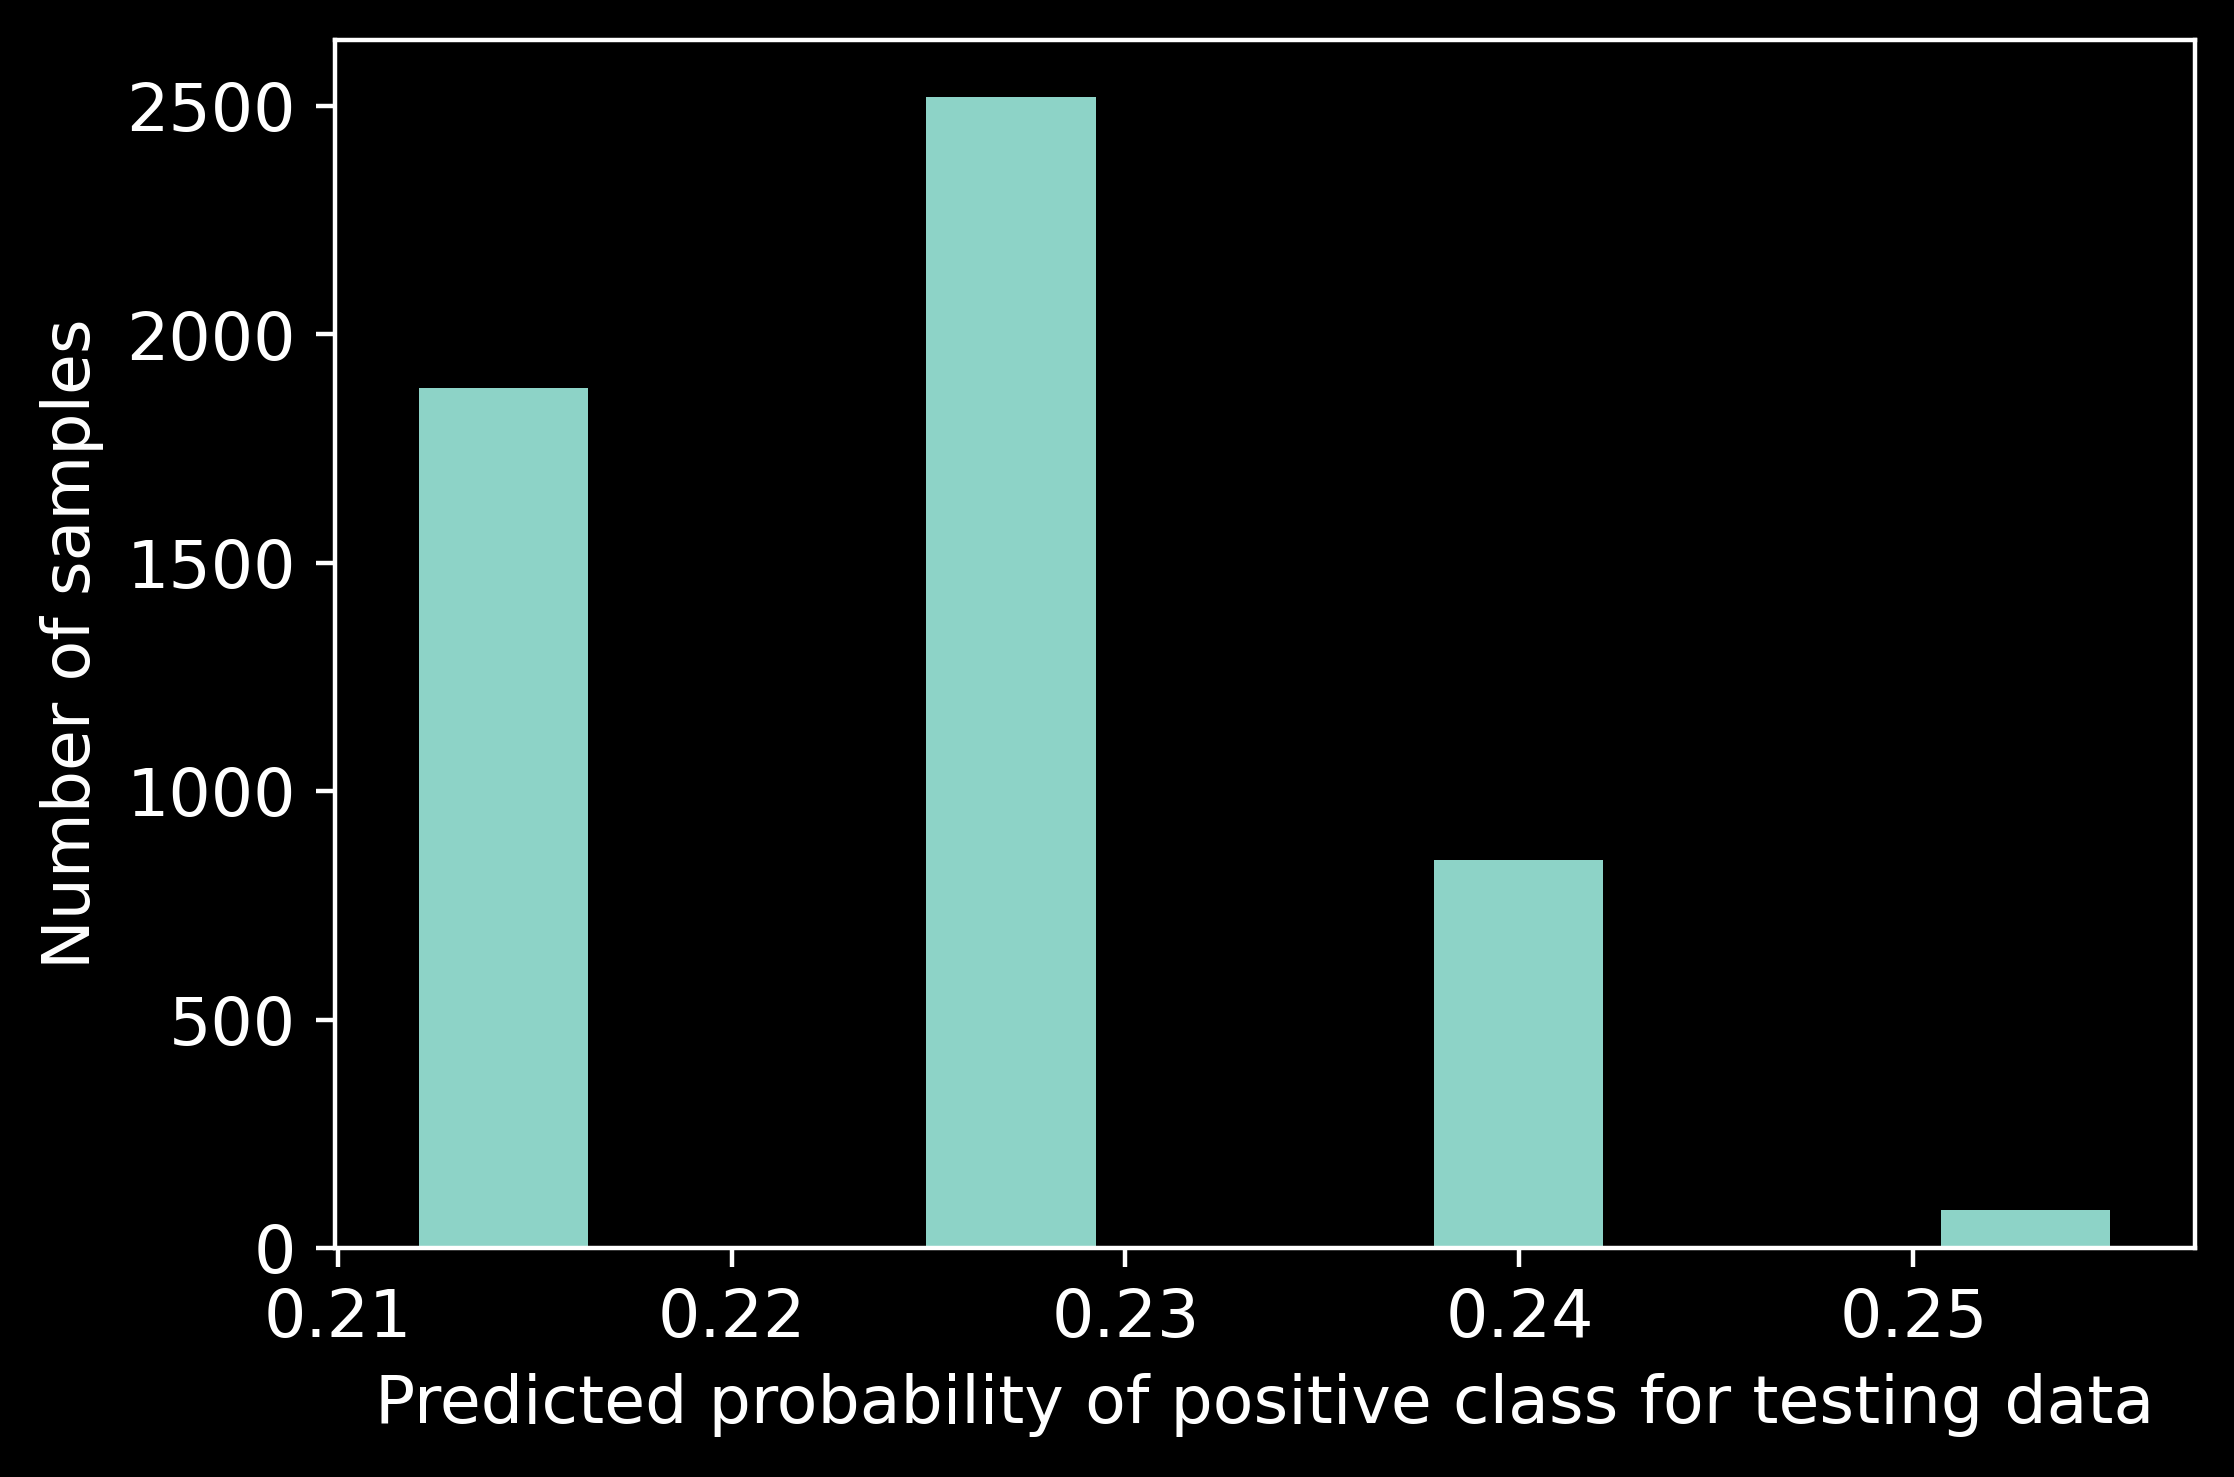

In [50]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [51]:
#getting positive and negative masks
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

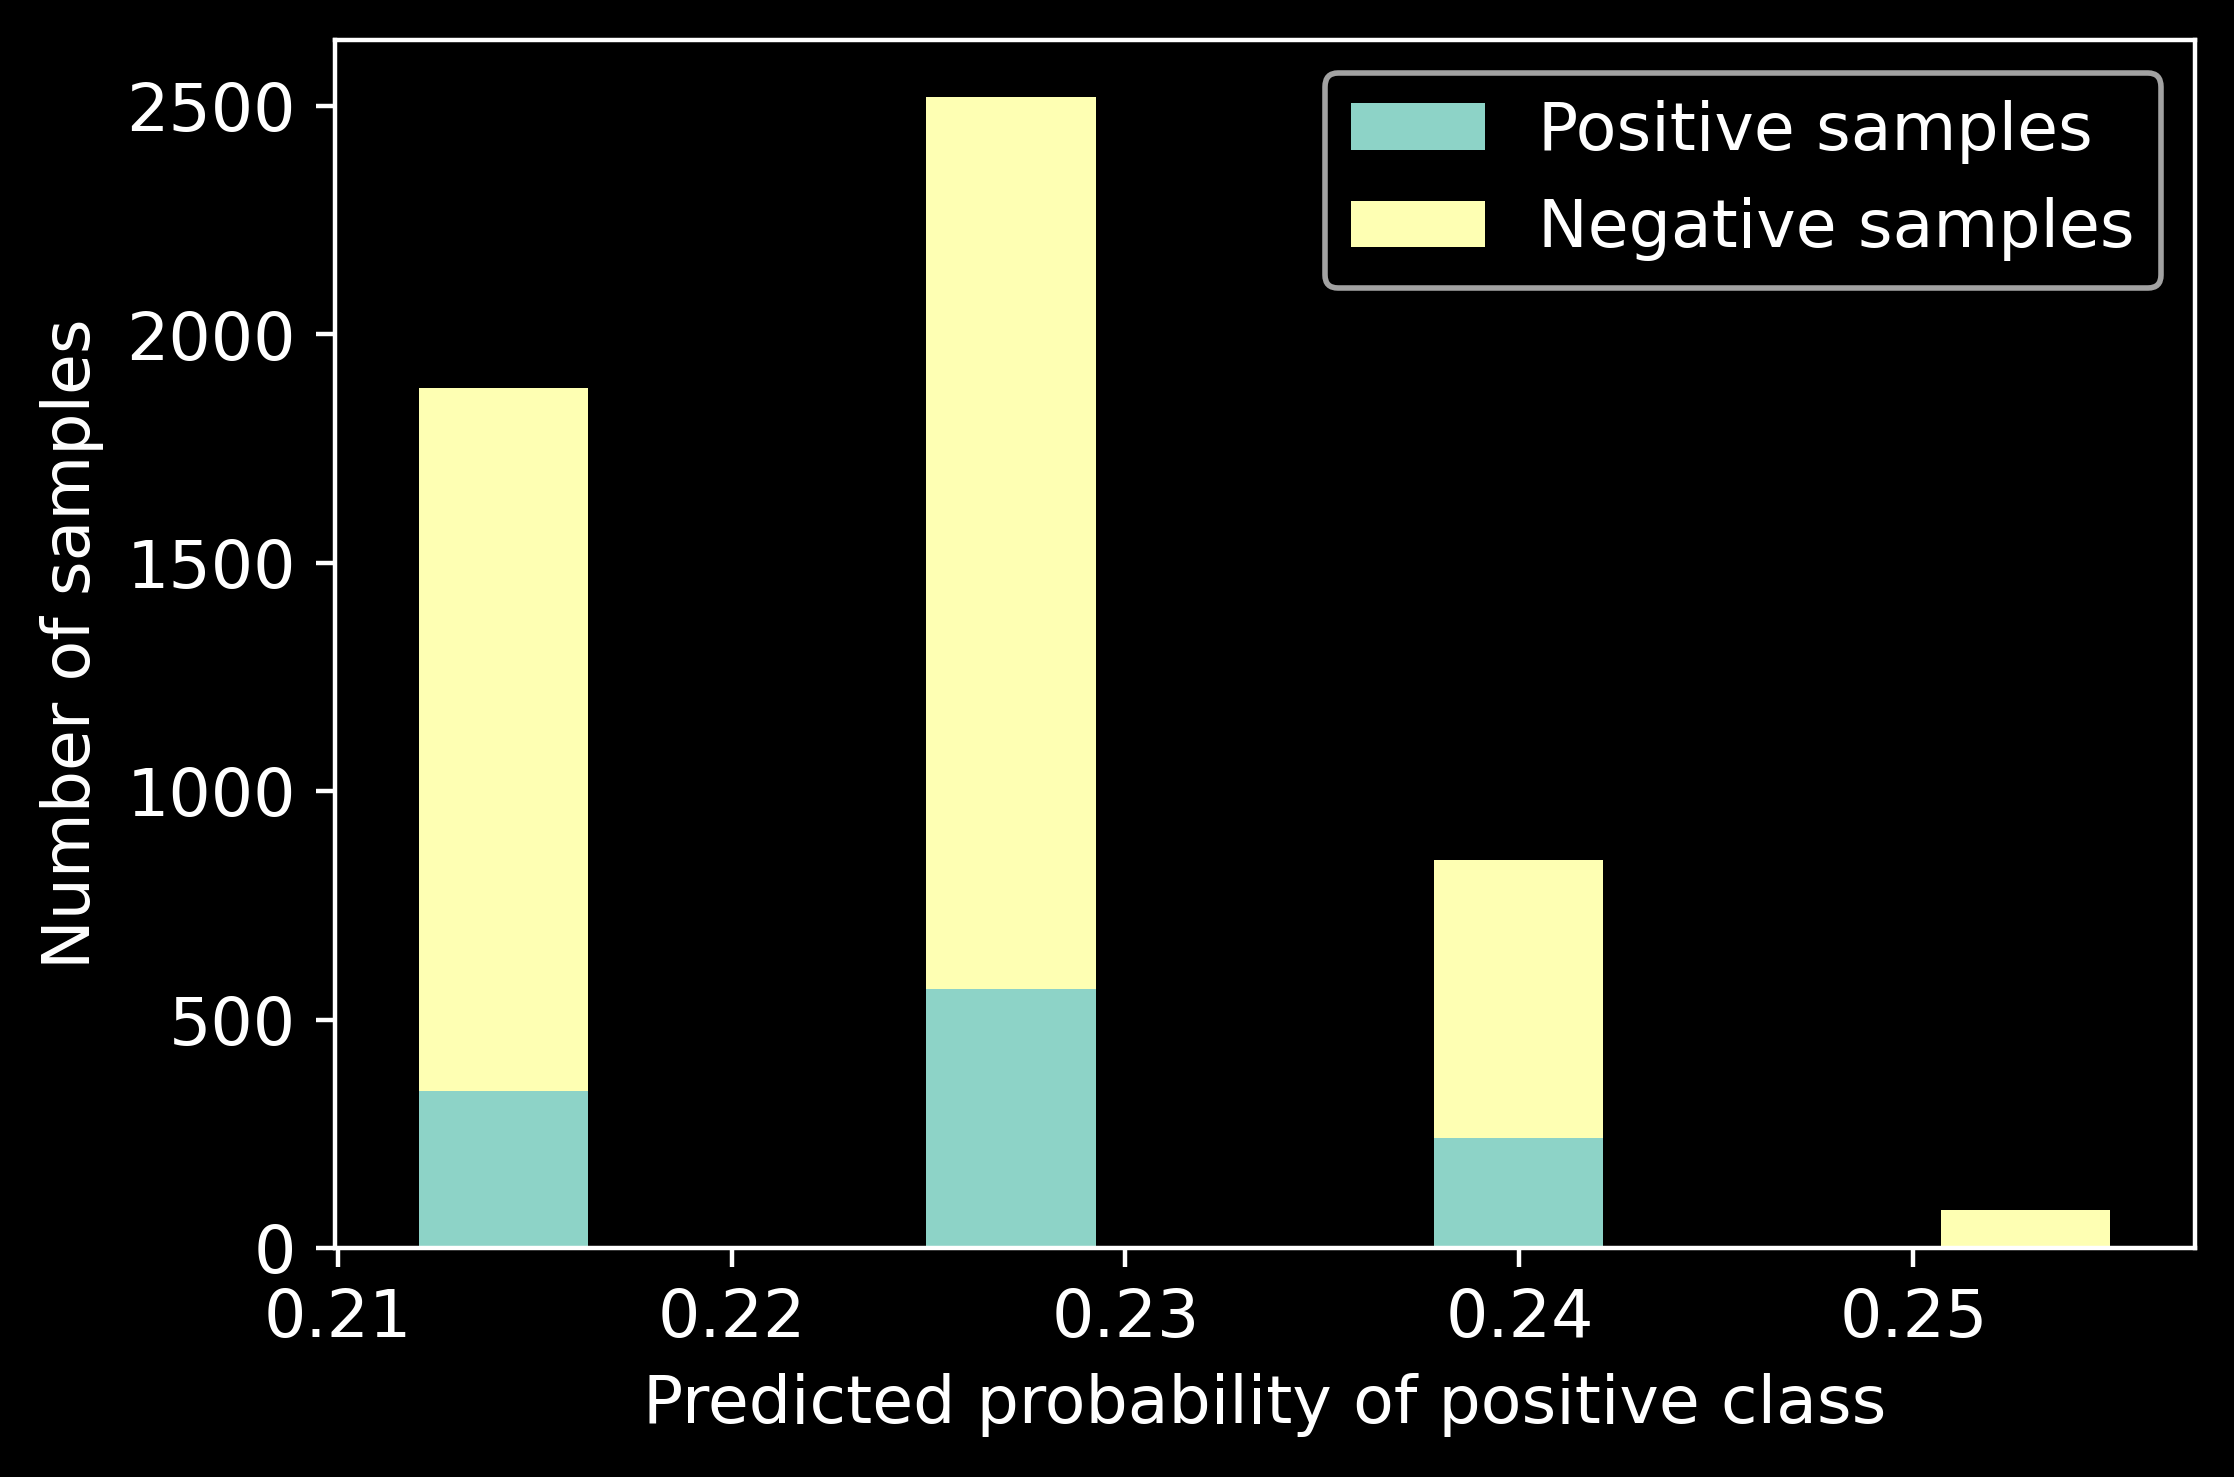

In [52]:
#stacked histogram
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [53]:
#generate arrays of TPR and FPR
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01842987 0.16419339 0.63140258 1.        ] [0.         0.004329   0.21212121 0.7030303  1.        ] [1.2549944  0.2549944  0.24007604 0.22576598 0.21207085]


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

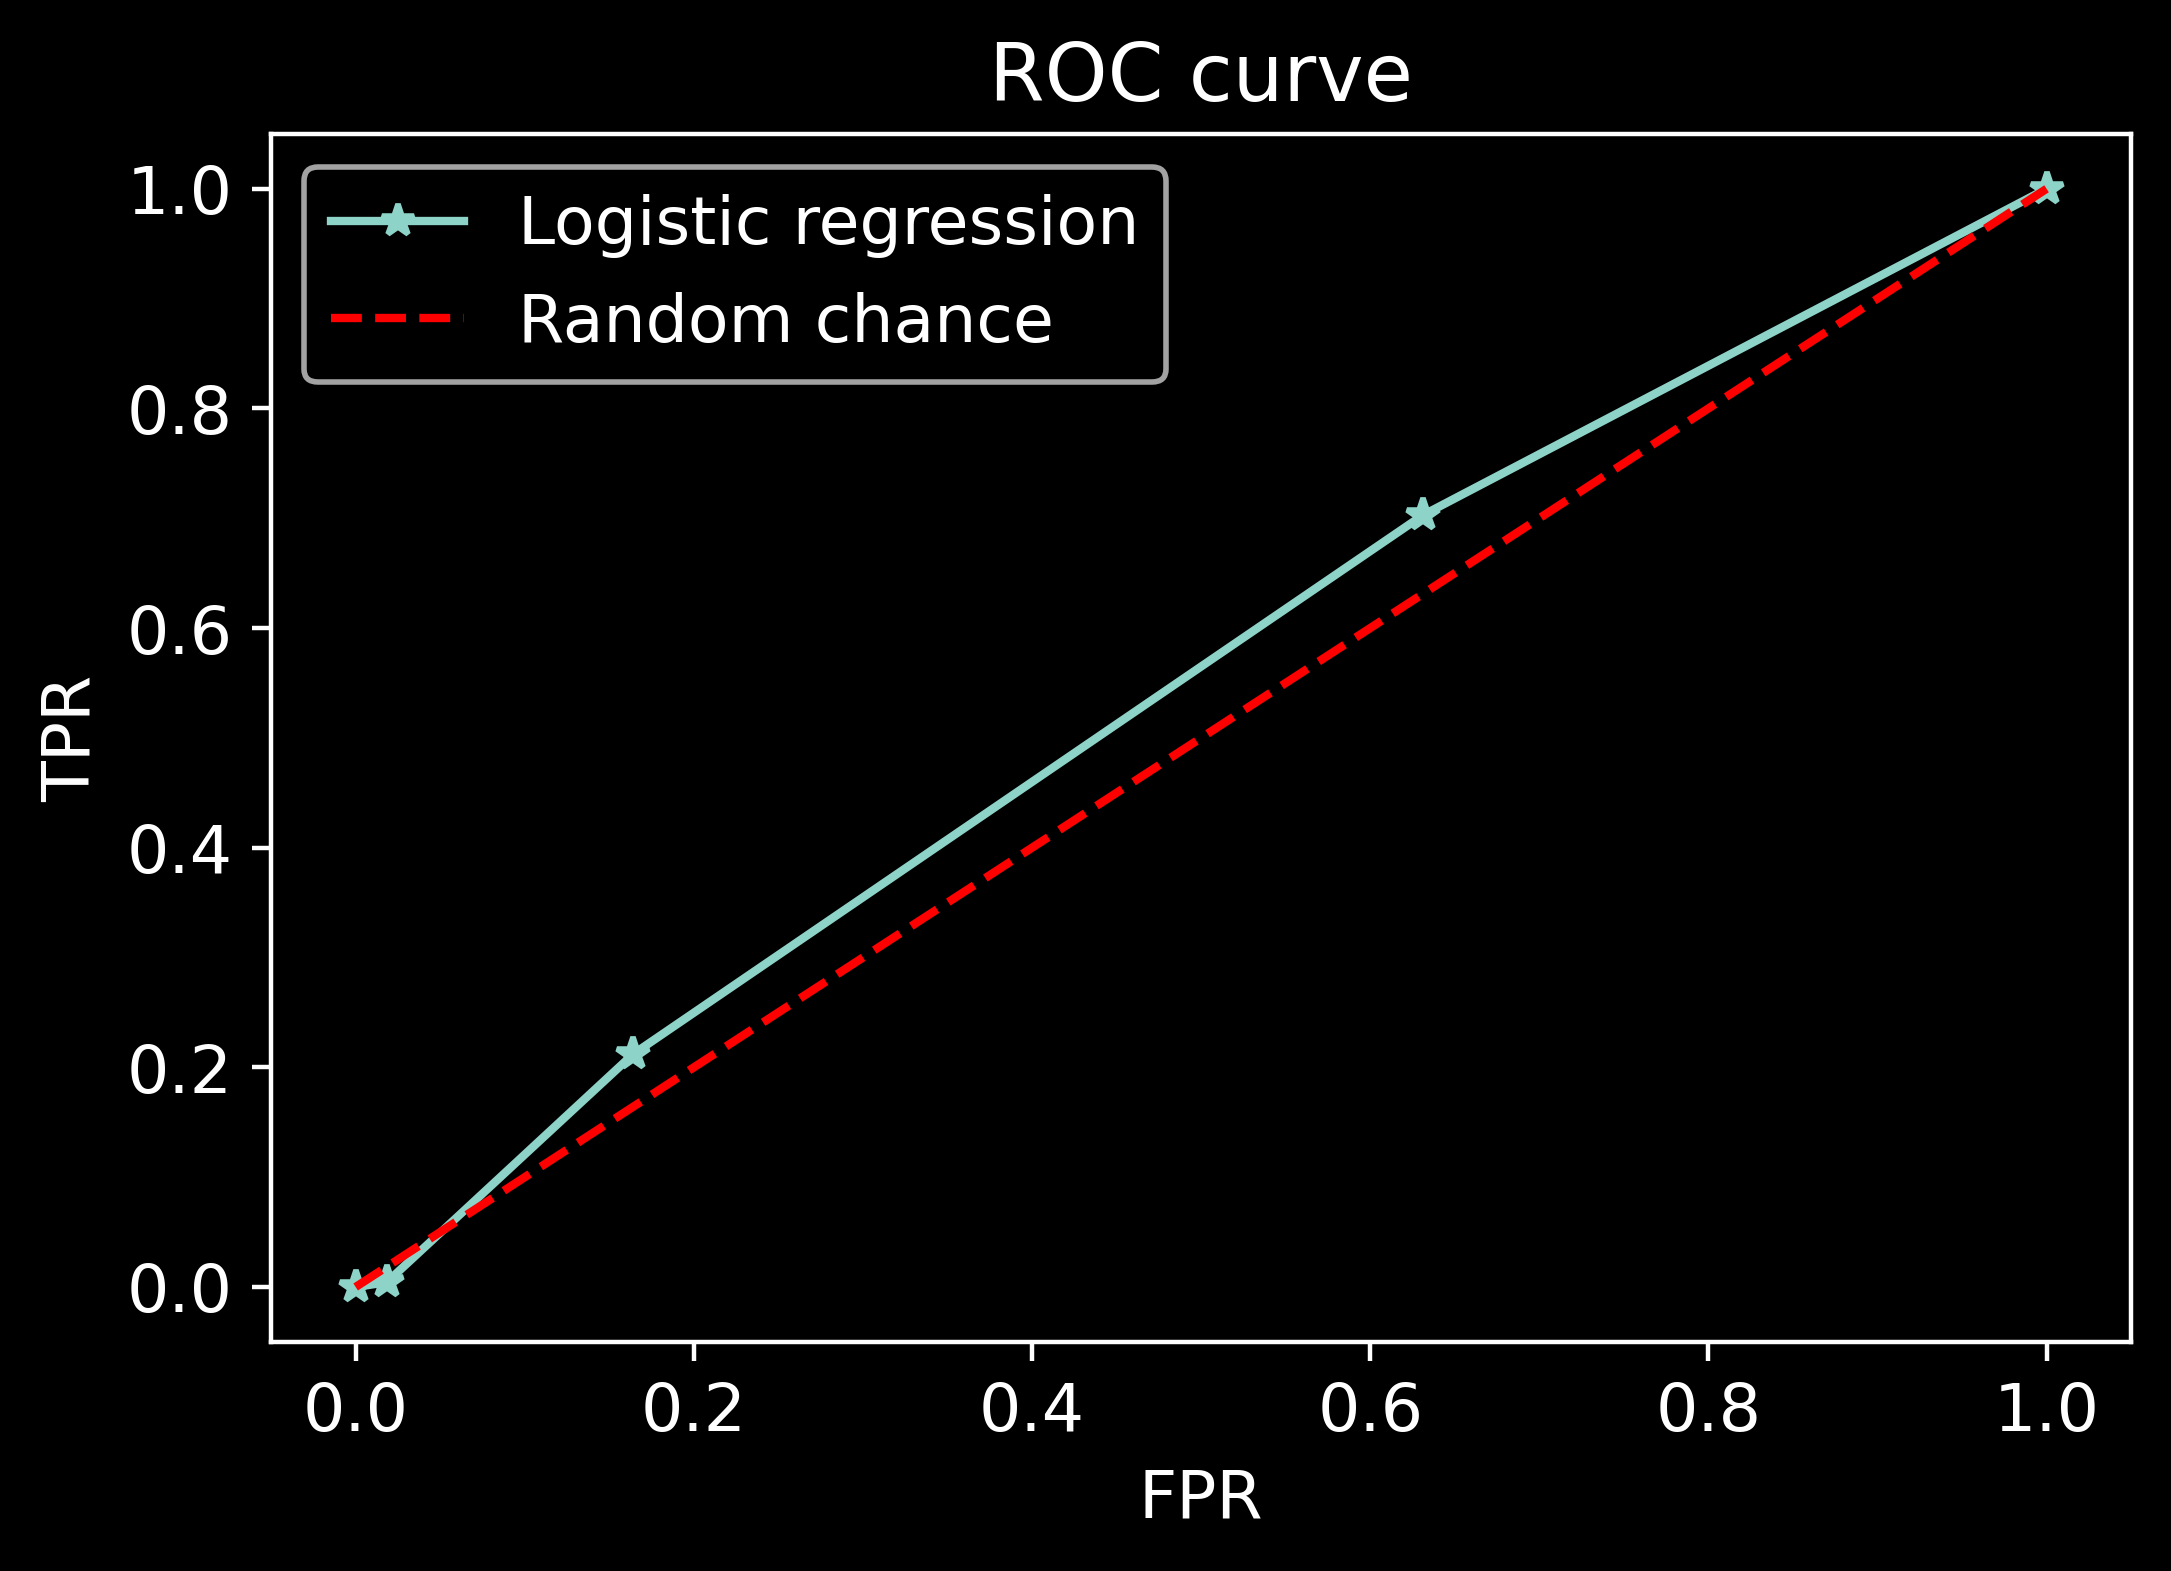

In [54]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [55]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [56]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [57]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21657604 0.23536232 0.26315789 0.06097561 1.        ] [1.         0.7030303  0.21212121 0.004329   0.        ] [0.21207085 0.22576598 0.24007604 0.2549944 ]


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


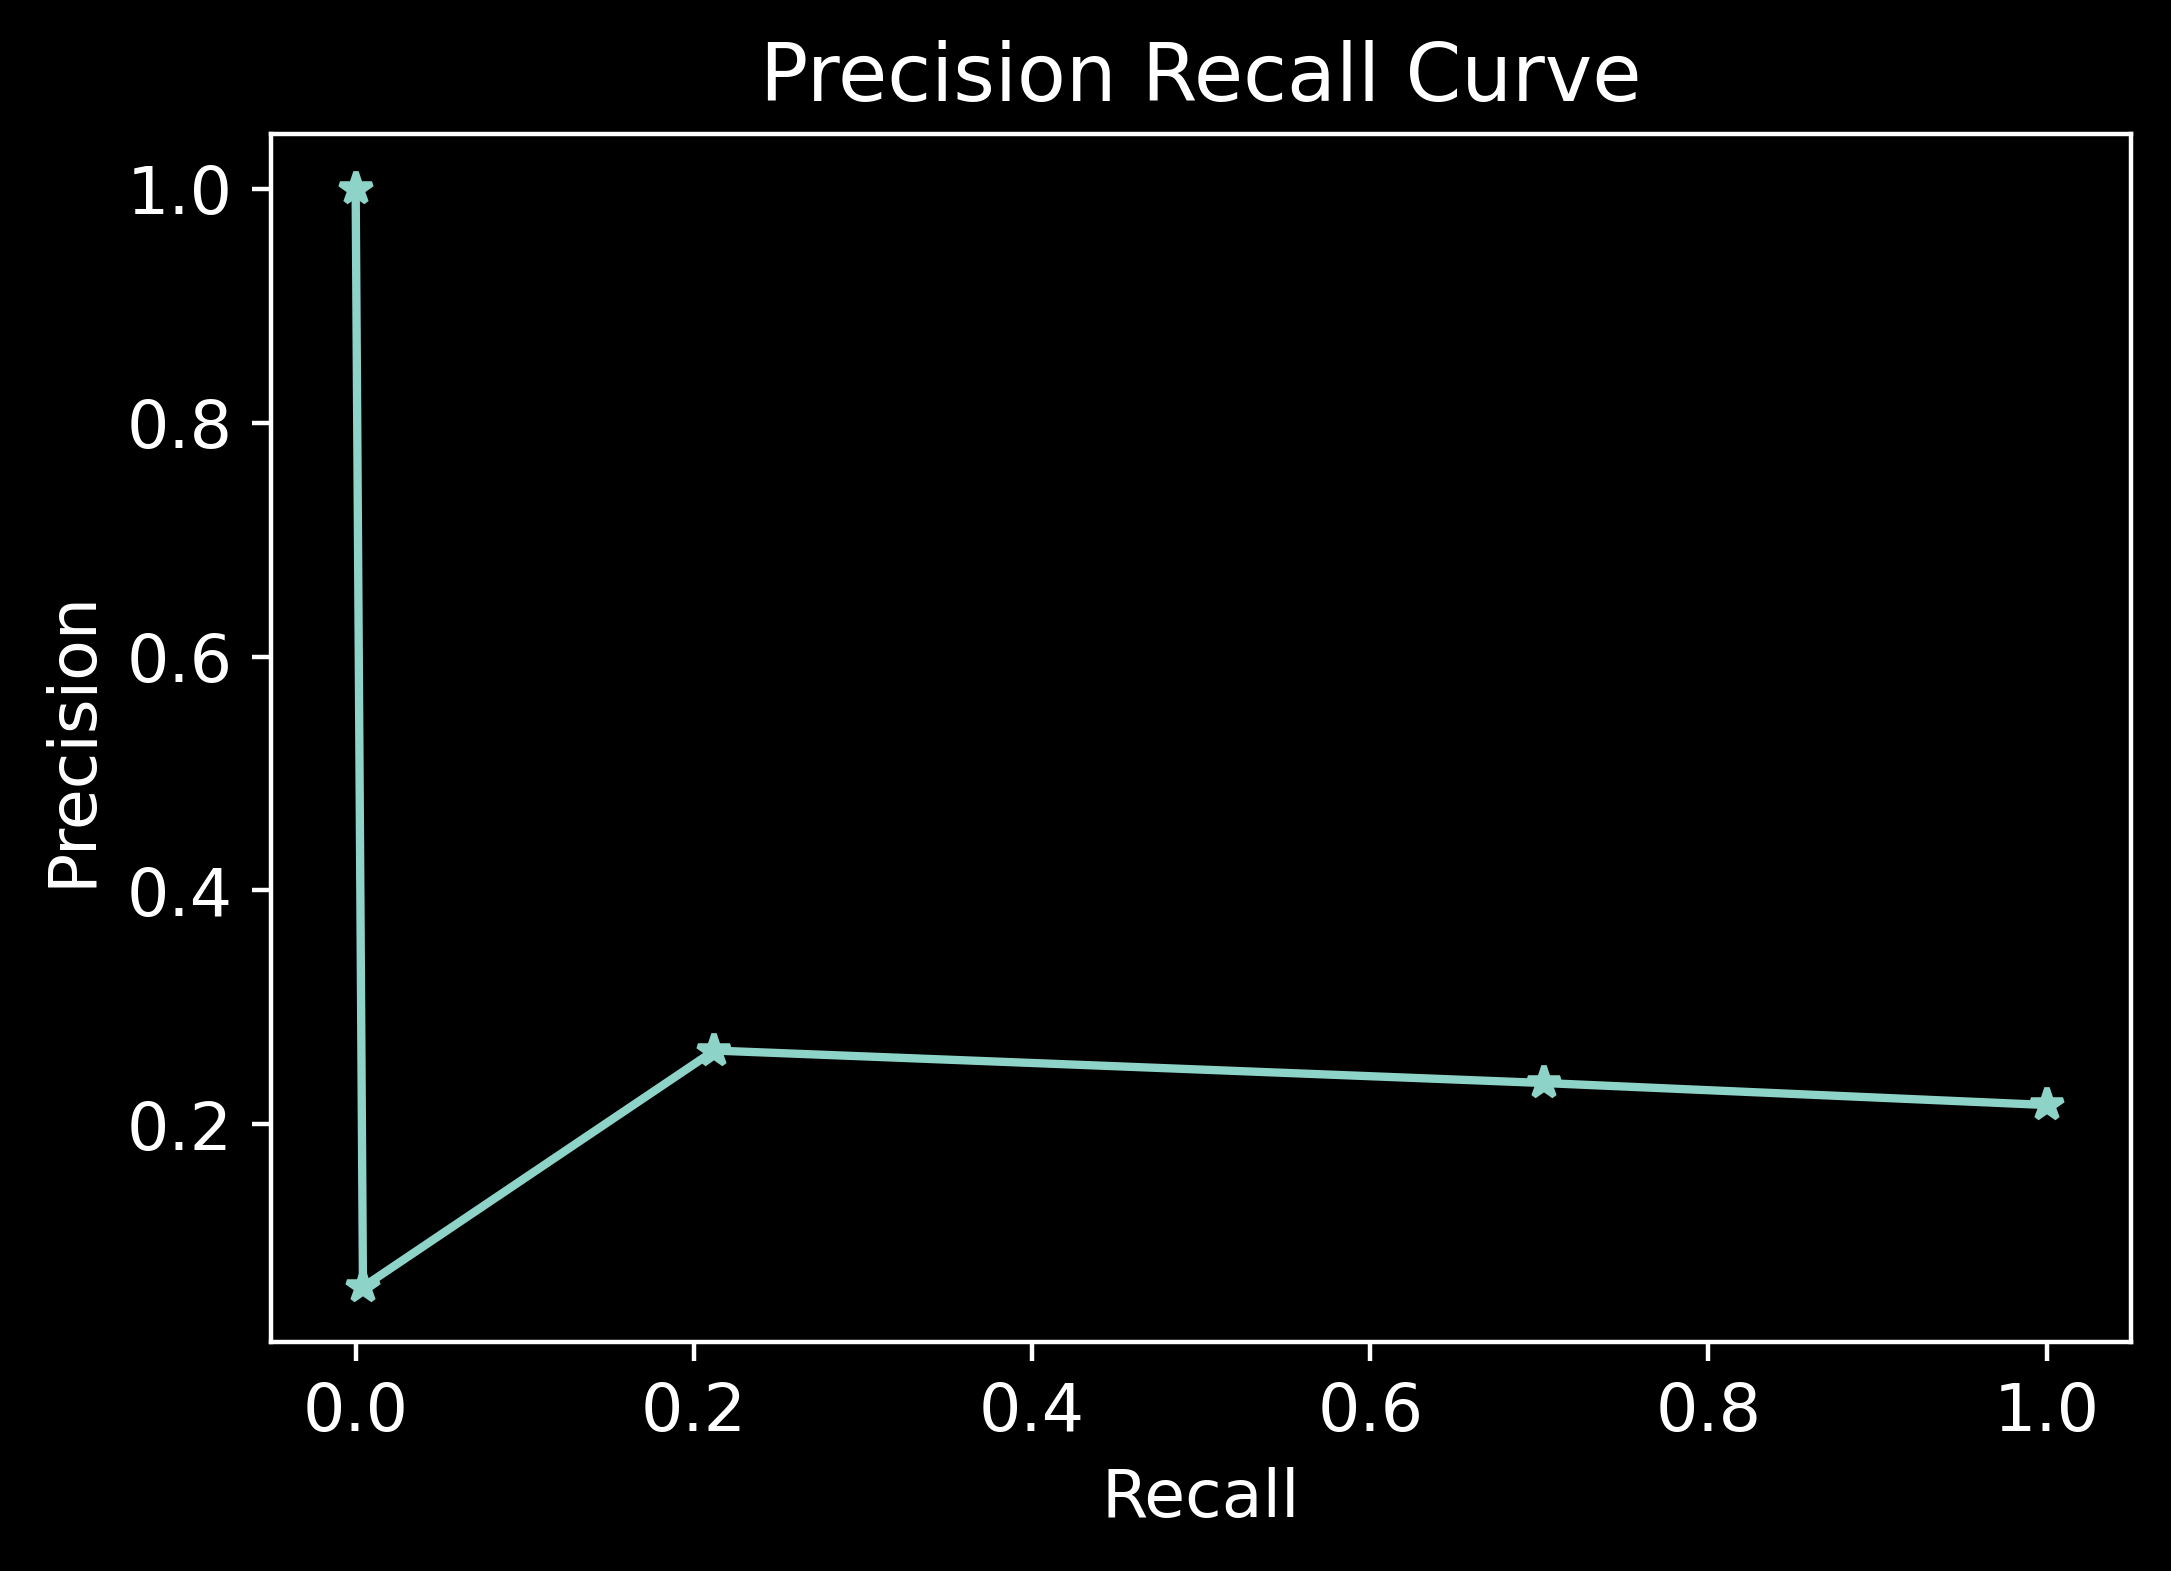

In [58]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [59]:
#auc to calculate the area under the given curve
metrics.auc(recall, precision)

0.22544274282968607

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [62]:
#getting training samples
y_train_prob = example_lr.predict_proba(X_train)

#get +ve probs
train_pos_prob = y_train_prob[:,1]

#getting required parameters
fpr,tpr,thresholds = metrics.roc_curve(y_train, train_pos_prob)

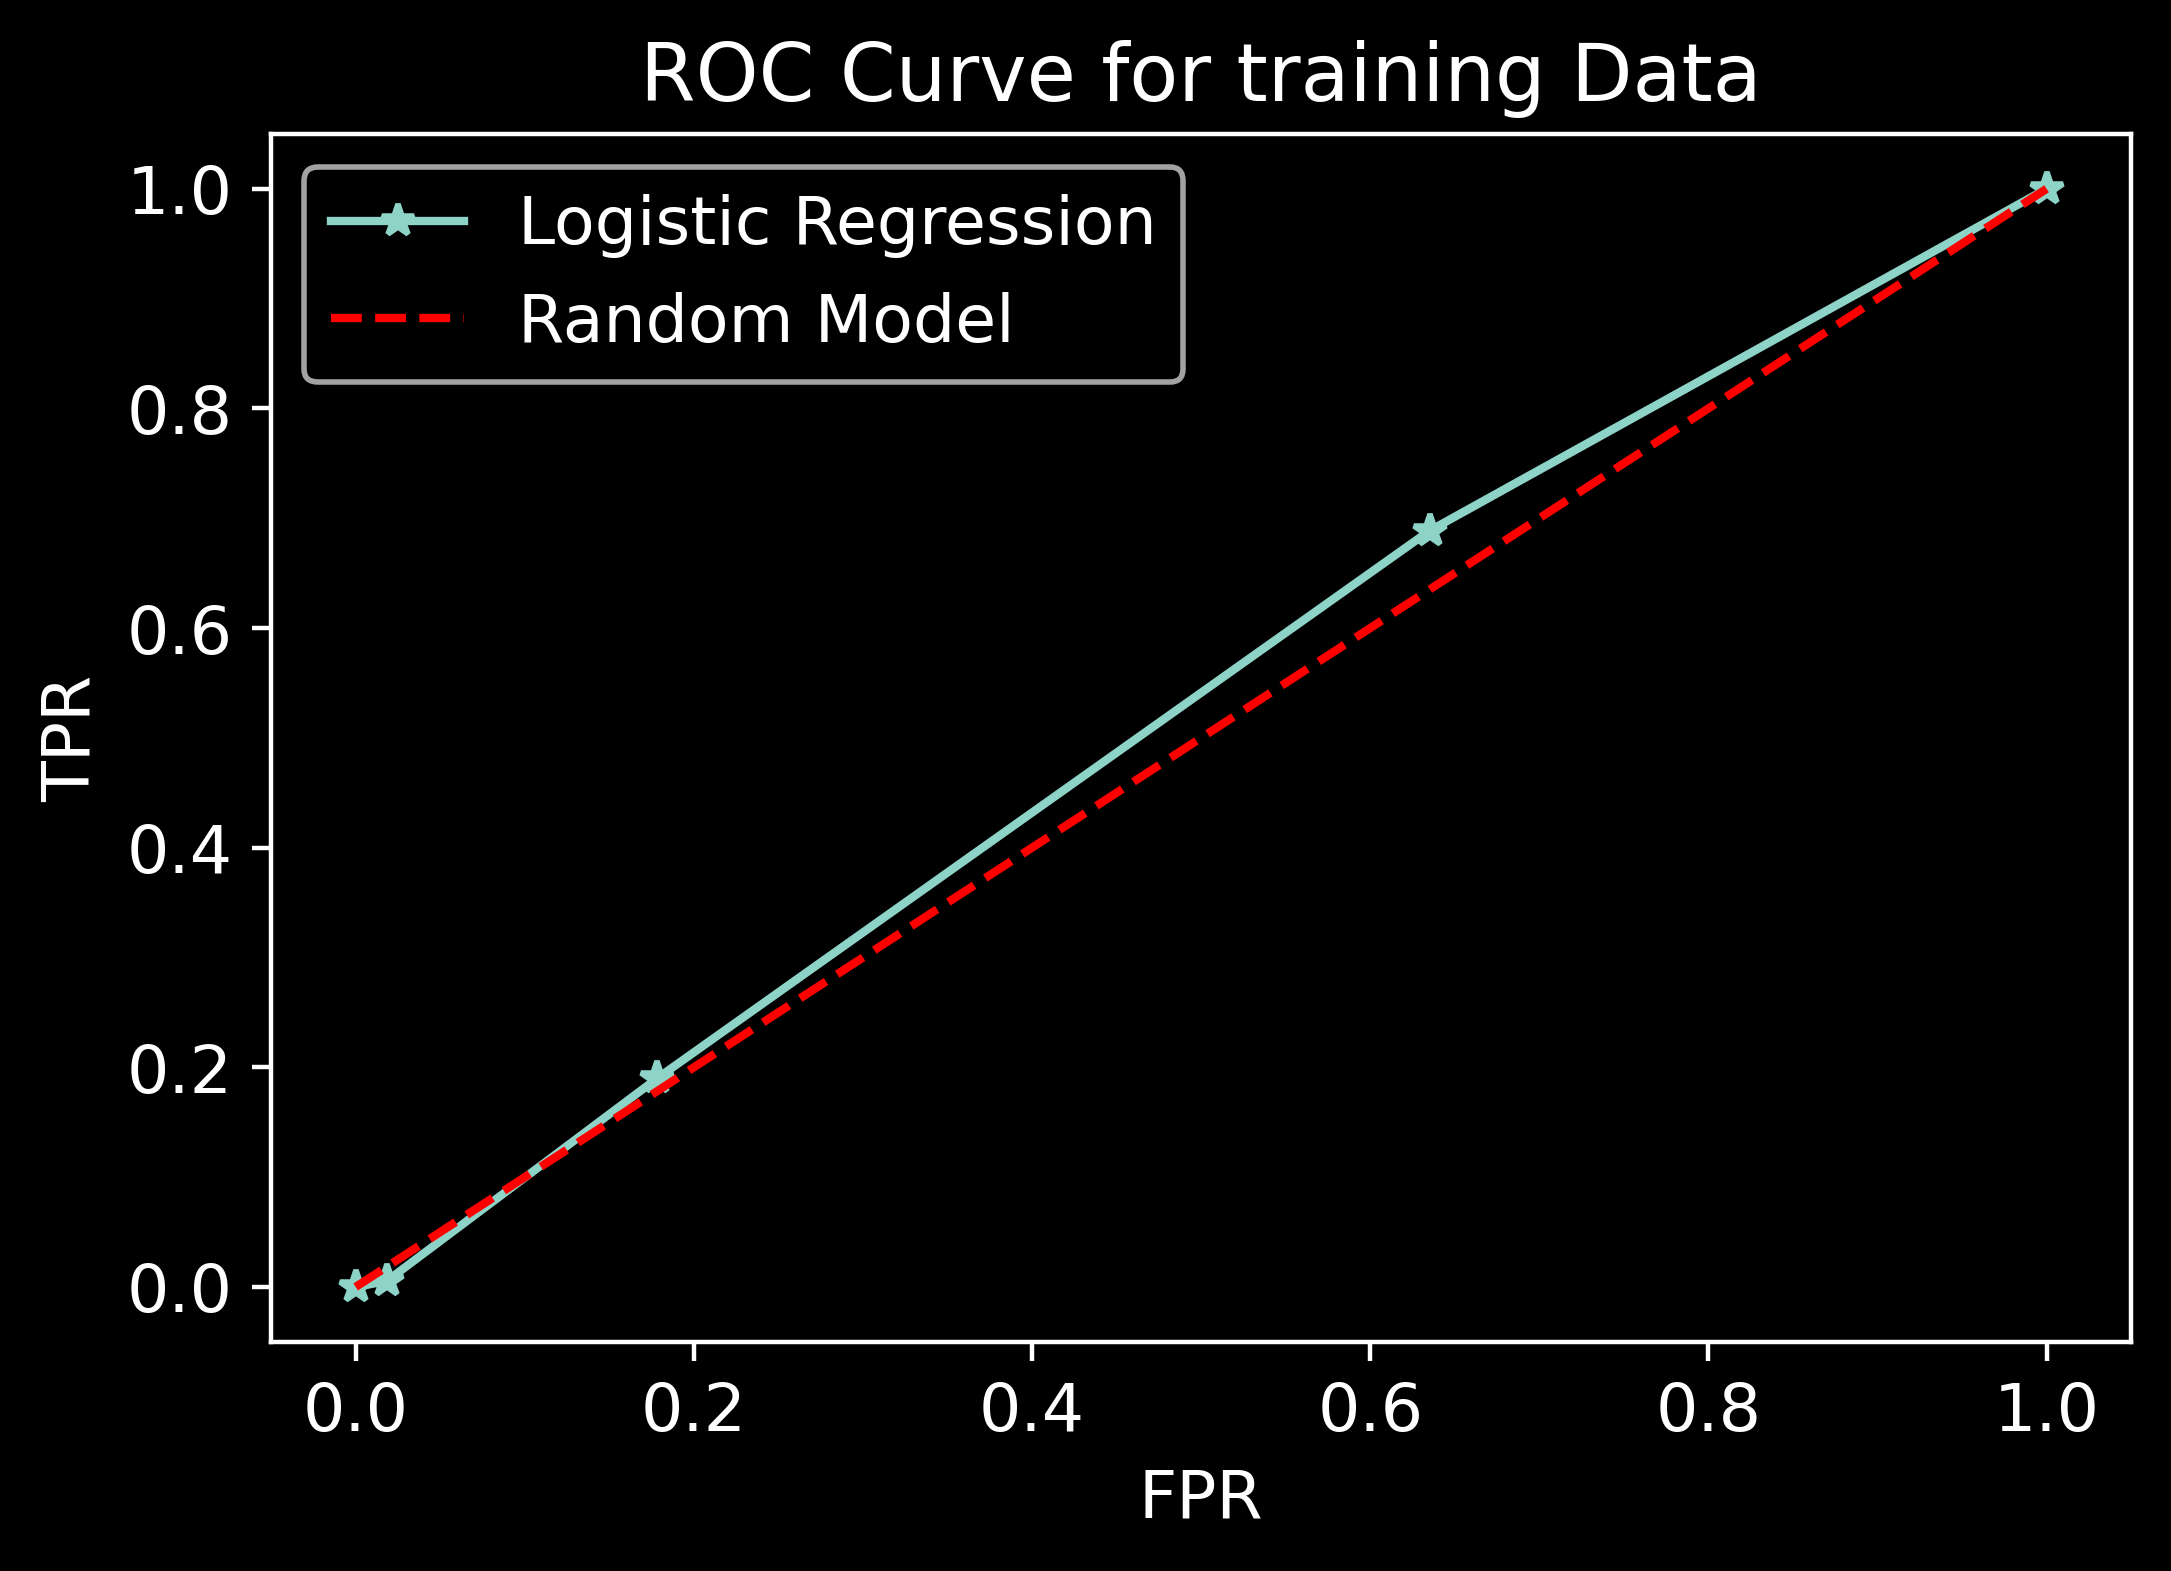

In [63]:
#plotting curve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression','Random Model'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training Data')
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
